# Spotiflow: detecting spots on a new image (inference)

Let's first load all the libraries we're gonna need to detect spots in our images.

In [1]:
from spotiflow.model import Spotiflow
from spotiflow.sample_data import test_image_hybiss_2d
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


We first need to read our image. We will use a sample image from the _HybISS_ dataset, but if you have your own image, just uncomment the lines, set the adequate image file and you will be good to go!

In [2]:
img = test_image_hybiss_2d()
# img = imread("YOUR_IMAGE_FILE_HERE")

Let's visualize the image to make sure everything is as it should:

<Figure size 640x480 with 0 Axes>

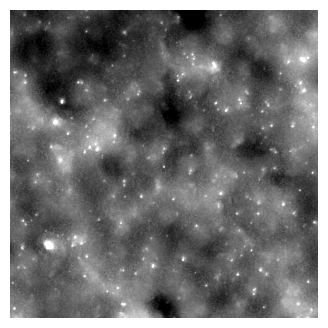

In [3]:
plt.clf()
plt.figure(figsize=(4,4))
plt.imshow(img, cmap="gray", clim=tuple(np.percentile(img[::8,::8], (1,99.8)).T))
plt.axis("off");

Let's now load the model. We will use the `general` model of Spotiflow which is trained on a variety of datasets including spatial transcriptomics images and frames of live-cell movies. Note that if it is your first time using this model, the model will be automatically downloaded (so the code snippet will take a little bit more to execute). Again, if you have trained your own model using the previous notebook, simply uncomment the line and change the model folder!

In [4]:
model = Spotiflow.from_pretrained("general")
# model = Spotiflow.from_folder("YOUR_MODEL_FOLDER_HERE")

Loading pretrained model general


We can now easily detect the spots by using the `model.predict()` function.

In [5]:
points, details = model.predict(img, subpix=True)

INFO:spotiflow.model.spotiflow:Will use device: mps:0
INFO:spotiflow.model.spotiflow:Predicting with prob_thresh = 0.500, min_distance = 1
INFO:spotiflow.model.spotiflow:Padding to shape (512, 512, 1)
INFO:spotiflow.model.spotiflow:Found 212 spots


The variable `points` is a NumPy array containing the centers of the detected spots. Let's visualize them:

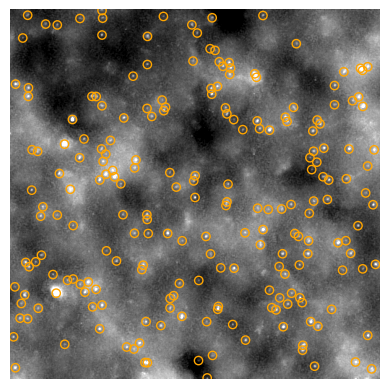

In [6]:
plt.clf()
plt.imshow(img, cmap="gray", clim=tuple(np.percentile(img[::8,::8], (1,99.8)).T))
plt.scatter(points[:,1], points[:,0], facecolors='none', edgecolors='orange')
plt.axis("off");

In case you wanna dig deeper on what the network actually predicted (i.e. the _Gaussian heatmap_ and the _Stereographic flow_), the variable details contains specifically that information:

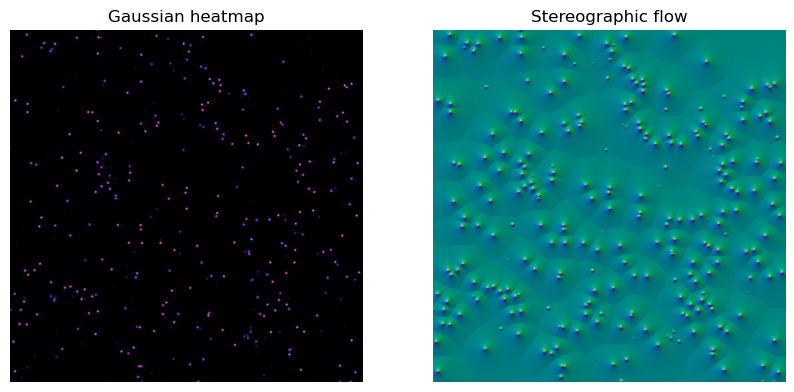

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(details.heatmap, cmap="magma")
ax[1].imshow(.5*(1+details.flow))
ax[0].axis("off"), ax[1].axis("off")
ax[0].set_title("Gaussian heatmap"), ax[1].set_title("Stereographic flow");